In [75]:
import re

def load_all_names() -> list[str]:
    # Task 1: Load all names and lower-case them
    result = []
    
    return result

all_names = load_all_names()
print(all_names[:20])
print(len(all_names))

['aaltje', 'aaron', 'abbe', 'abbo', 'abelina', 'abeline', 'abelke', 'abelone', 'abi', 'abigail', 'abilo', 'abo', 'abraham', 'achatius', 'achaz', 'achill', 'achilles', 'achim', 'ada', 'adalar']
5276


In [76]:
# Just exploring character bi-gram counts
b = {}
for w in all_names:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

# sort by value, reverse
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', '<EOS>'), 1167),
 (('i', 'n'), 816),
 (('e', 'r'), 792),
 (('e', '<EOS>'), 790),
 (('d', '<EOS>'), 738),
 (('a', 'r'), 733),
 (('r', 'i'), 641),
 (('a', 'n'), 620),
 (('<BOS>', 'a'), 537),
 (('e', 'l'), 523),
 (('a', 'l'), 476),
 (('i', 'l'), 465),
 (('d', 'e'), 454),
 (('s', '<EOS>'), 447),
 (('t', '<EOS>'), 422),
 (('l', 'i'), 405),
 (('n', 'a'), 396),
 (('l', 'd'), 396),
 (('n', '<EOS>'), 393),
 (('i', 'e'), 388),
 (('<BOS>', 'h'), 385),
 (('r', 'a'), 372),
 (('r', 't'), 365),
 (('u', 's'), 362),
 (('<BOS>', 'e'), 353),
 (('m', 'a'), 348),
 (('h', 'e'), 338),
 (('b', 'e'), 337),
 (('n', 'd'), 332),
 (('<BOS>', 'r'), 327),
 (('<BOS>', 's'), 326),
 (('r', '<EOS>'), 323),
 (('e', 'n'), 319),
 (('n', 'e'), 317),
 (('<BOS>', 'g'), 317),
 (('o', 'l'), 312),
 (('h', 'a'), 310),
 (('r', 'e'), 302),
 (('o', 'r'), 302),
 (('l', 'a'), 300),
 (('<BOS>', 'b'), 295),
 (('i', 'a'), 291),
 (('<BOS>', 'l'), 287),
 (('r', 'd'), 280),
 (('t', 'h'), 276),
 (('<BOS>', 'w'), 274),
 (('o', '<EOS>'

In [77]:
# Task 2: construct bigram counts tensor


# All characters + one special character "." for both BOS and EOS

chars = None
print(chars)


['.', ' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ß', 'ä', 'ô', 'ö', 'ø', 'ü']
34


In [78]:
# string to index, index to string
str_to_idx = None
idx_to_str = None
print(str_to_idx)
print(idx_to_str)


{'.': 0, ' ': 1, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27, 'ß': 28, 'ä': 29, 'ô': 30, 'ö': 31, 'ø': 32, 'ü': 33}
{0: '.', 1: ' ', 2: 'a', 3: 'b', 4: 'c', 5: 'd', 6: 'e', 7: 'f', 8: 'g', 9: 'h', 10: 'i', 11: 'j', 12: 'k', 13: 'l', 14: 'm', 15: 'n', 16: 'o', 17: 'p', 18: 'q', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'v', 24: 'w', 25: 'x', 26: 'y', 27: 'z', 28: 'ß', 29: 'ä', 30: 'ô', 31: 'ö', 32: 'ø', 33: 'ü'}


In [79]:
import torch
bigram_count_matrix = None


print(bigram_count_matrix)


torch.Size([34, 34])
tensor([[   1,    1,  538,  ...,    1,    1,    1],
        [   1,    1,    1,  ...,    1,    1,    1],
        [1168,    1,    9,  ...,    1,    1,    1],
        ...,
        [   1,    1,    1,  ...,    1,    1,    1],
        [   1,    1,    1,  ...,    1,    1,    1],
        [   1,    1,    1,  ...,    1,    1,    1]], dtype=torch.int32)


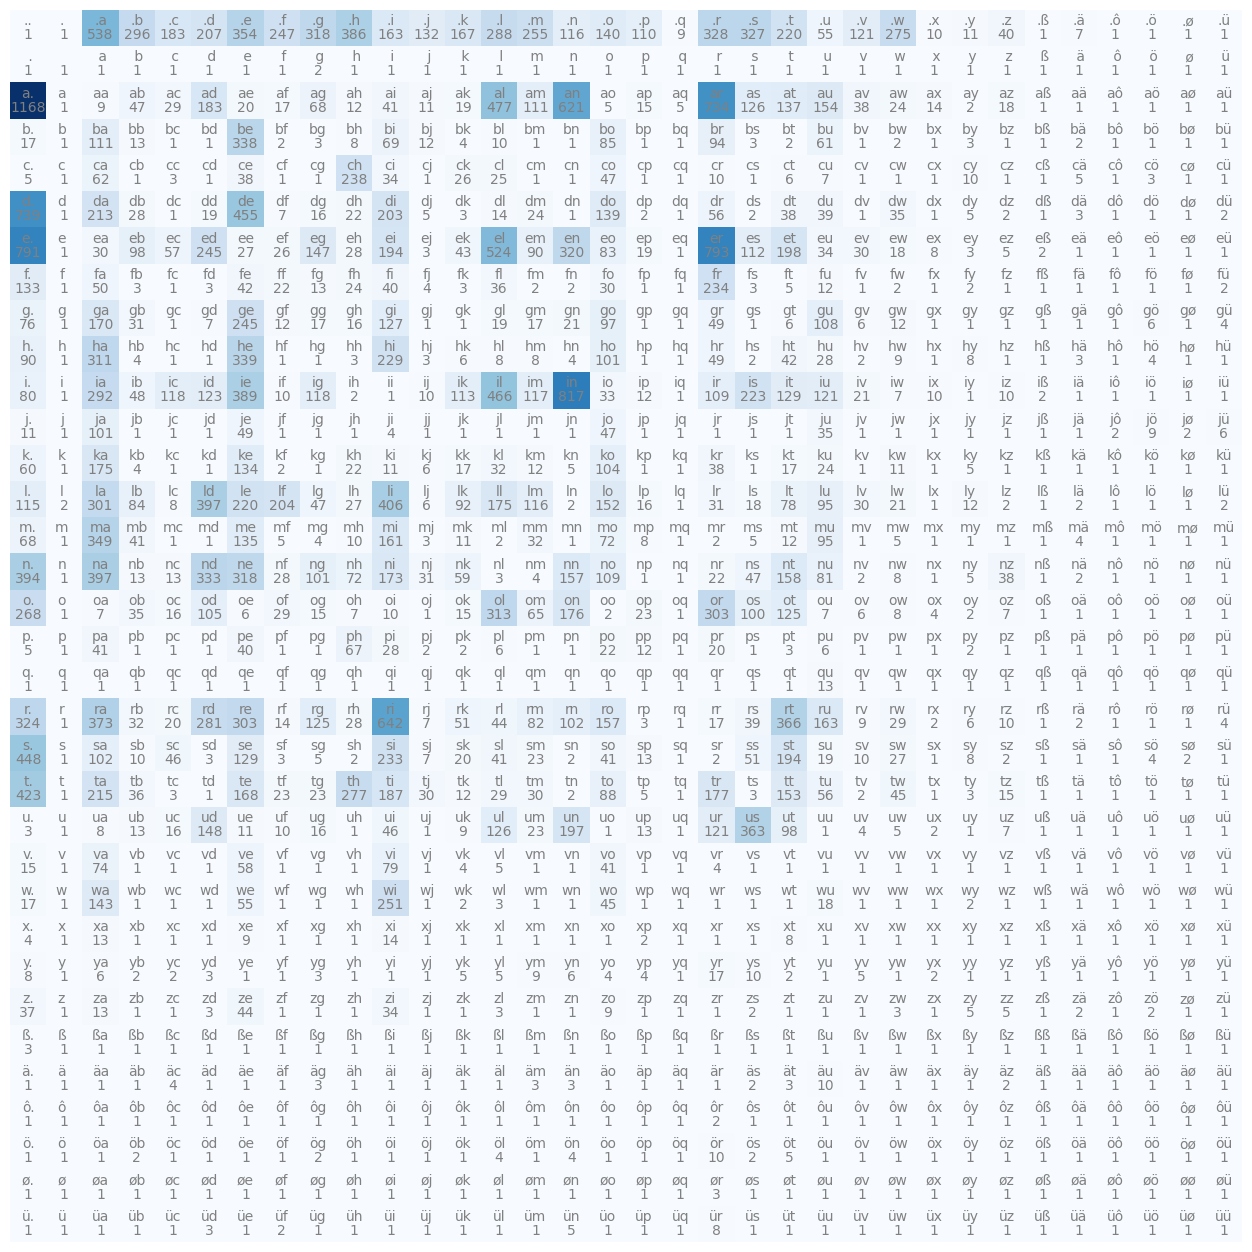

In [80]:
# Visualise bigram count matrix
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(bigram_count_matrix, cmap='Blues')
for i in range(len(chars)):
    for j in range(len(chars)):
        chstr = idx_to_str[i] + idx_to_str[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, bigram_count_matrix[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [81]:
# Task 3: Create bigram conditional probability matrix

# First do it for the first row and sample the first character

p = None
p

tensor([0.0002, 0.0002, 0.1013, 0.0557, 0.0345, 0.0390, 0.0667, 0.0465, 0.0599,
        0.0727, 0.0307, 0.0249, 0.0315, 0.0542, 0.0480, 0.0218, 0.0264, 0.0207,
        0.0017, 0.0618, 0.0616, 0.0414, 0.0104, 0.0228, 0.0518, 0.0019, 0.0021,
        0.0075, 0.0002, 0.0013, 0.0002, 0.0002, 0.0002, 0.0002])

In [82]:
g = torch.Generator().manual_seed(42)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
idx_to_str[ix]

'w'

In [83]:
# Now pre-compute the conditional probs for each row

# Use "add-one" smoothing!! so each value in the bigram count matrix is increased artificially by one
cond_probs_matrix = None

In [84]:
cond_probs_matrix

tensor([[1.8832e-04, 1.8832e-04, 1.0132e-01,  ..., 1.8832e-04, 1.8832e-04,
         1.8832e-04],
        [2.8571e-02, 2.8571e-02, 2.8571e-02,  ..., 2.8571e-02, 2.8571e-02,
         2.8571e-02],
        [2.8405e-01, 2.4319e-04, 2.1887e-03,  ..., 2.4319e-04, 2.4319e-04,
         2.4319e-04],
        ...,
        [1.7857e-02, 1.7857e-02, 1.7857e-02,  ..., 1.7857e-02, 1.7857e-02,
         1.7857e-02],
        [2.7778e-02, 2.7778e-02, 2.7778e-02,  ..., 2.7778e-02, 2.7778e-02,
         2.7778e-02],
        [2.0833e-02, 2.0833e-02, 2.0833e-02,  ..., 2.0833e-02, 2.0833e-02,
         2.0833e-02]])

In [85]:
# Task 4: Generate random "names"

g = torch.Generator().manual_seed(42)

for i in range(25):
    out = None
    print(''.join(out))



arontjehta.
lelolaolbe.
murinn.
han.
ichepalvoriwa.
wichidendar.
fro.
beitw.
rkrind.
ban.
onjona.
misme.
s.
dbonosinuäôdrewicharannied.
rda.
onere.
qündelos.
ha.
barinaldachimanegrcas.
hebea.
gbralherilrieit.
twerlindorka.
jugdoninkalhag.
h.
g ost.
fhd.
fld.
mave.
a.
flo.
rd.
gwasuneor.
wusan.
ma.
alktielma.
gerima.
kho.
rilk.
tirmerinfrid.
ried.
mialdemartwia.
b.
hia.
r.
t.
magma.
s.
le.
llun.
cars.
